# 1. Introducción teórica

https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200

Un **hiperplano** en el espacio n-dimensional es un subespacio de dimensión n-1.

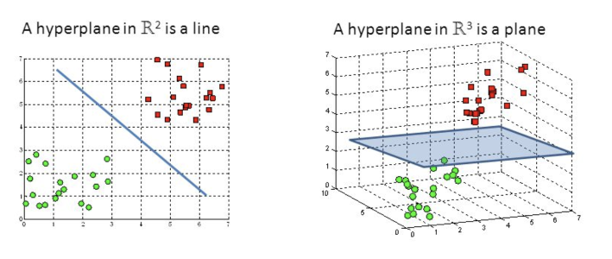

El **algoritmo SVM (Support Vector Machines)** es un algoritmo de aprendizaje supervisado que se utiliza principalmente para tareas de clasificación, aunque también se utiliza para tareas de regresión e incluso de tareas de detección de outliers.

Un espacio vectorial tiene infinitos hiperplanos, el objetivo del algoritmo SVM es encontrar un hiperplano con el máximo margen (máxima distancia entre puntos de ambas clases). Este hiperplano será la frontera de decisión.

Los **vectores de soporte** son los puntos que están más cerca del hiperplano y definen la posición y orientación del mismo (lo sostienen). Con ellos, se maximiza el clasificador, y si se borraran, la posición del hiperplano cambiaría.

La solución a este problema consiste en seleccionar como clasificador óptimo al que se conoce como *maximal margin hyperplane o hiperplano óptimo de separación*, que se corresponde con el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Para obtenerlo, se tiene que calcular la distancia perpendicular de cada observación a un determinado hiperplano. La menor de estas distancias (conocida como margen) determina como de alejado está el hiperplano de las observaciones de entrenamiento.

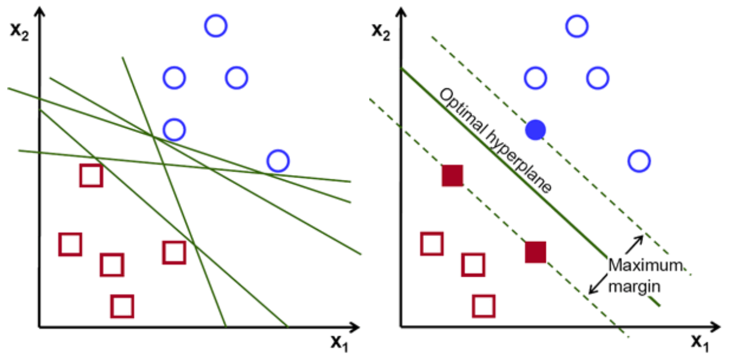

El Maximal Margin Classifier descrito en la sección anterior tiene poca aplicación práctica, ya que rara vez se encuentran casos en los que las clases sean perfecta y linealmente separables.

Por estas razones, es preferible crear un clasificador basado en un hiperplano que, aunque no separe perfectamente las dos clases, sea más robusto y tenga mayor capacidad predictiva al aplicarlo a nuevas observaciones (menos problemas de overfitting). Esto es exactamente lo que consiguen los clasificadores de vector soporte, también conocidos como **soft margin classifiers** o Support Vector Classifiers. Para lograrlo, en lugar de buscar el margen de clasificación más ancho posible que consigue que las observaciones estén en el lado correcto del margen; se permite que ciertas observaciones estén en el lado incorrecto del margen o incluso del hiperplano.

Para ello, se utiliza el **parámetro C**, que permite flexibilizar la solución. Cuando más se aproxima C a cero, menos se penalizan los errores y más observaciones pueden estar en el lado incorrecto del margen o incluso del hiperplano.


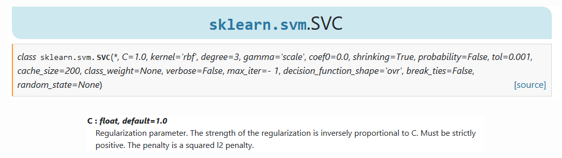

## 1.1 Funciones Kernel

El problema de lo visto anteriormente es que en la mayoría de problemas de clasificación los datos no se pueden separar linealmente mediante un hiperplano. Pero sé es posible, transformar los datos a una dimensión de mayor tamaño donde éstos sí son linealmente separables. Esta transformación se conoce como **kernel trick** y se hace mediante las **kernel functions**. Algunas de las más comunes son:

- *Lineal:* cuando los datos se pueden separar linealmente
- *Gaussian:* cuando no hay conocimiento previo de los datos
- *Radial Basis Fuction (RBF):* similar al anterior pero agregando el método de base radial para mejorar la transformación
- *Polinomial:* comúnmente utilizado en procesamiento de la imagen
- *Sigmoide:* similar a un perceptrón de dos capas
- *Gaussian:* cuando no hay conocimiento previo de los datos

# 2. SVM Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
x_coord = [1, 0.5, 2, 1.5, 6, 7, 7.75, 9]
y_coord = [4, 0.5, 3, 2.5, 9, 10, 9.5, 8.5]

# Como es un algoritmo supervisado, se crean tb las etiquetas: clases 0 y 1
clase = np.array([0, 0, 0, 0, 1, 1, 1, 1])
X = np.vstack((x_coord, y_coord)).T
X

array([[ 1.  ,  4.  ],
       [ 0.5 ,  0.5 ],
       [ 2.  ,  3.  ],
       [ 1.5 ,  2.5 ],
       [ 6.  ,  9.  ],
       [ 7.  , 10.  ],
       [ 7.75,  9.5 ],
       [ 9.  ,  8.5 ]])

Buscamos el hiperplano que nos ayude a clasificar, al estar en dimensión 2, será una recta, con una ecuación de la forma:

- **y = b*x + a**

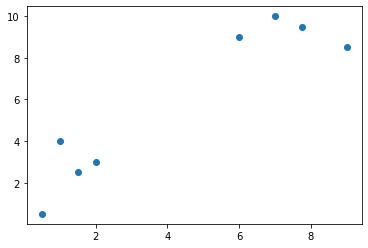

In [3]:
plt.scatter(x_coord, y_coord)

In [4]:
# Se instancia el clasificador (ahora no está entrenado)
# Empezamos por la clasificación lineal que es la más sencilla
classifier = SVC(kernel='linear')

In [5]:
# Se entrena el modelo
results = classifier.fit(X, clase)

In [6]:
results.coef_

array([[0.19964497, 0.20023669]])

In [7]:
results.coef_[0]

array([0.19964497, 0.20023669])

**Doc scikit learn**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

**coef_** -->ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)

Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

Luego tenemos que dividir para obtener los coeficientes a y b del hiperplano (para quitar los pesos)

In [8]:
b = - results.coef_[0][0]/results.coef_[0][1]
a = - results.intercept_[0]/results.coef_[0][1]
a,b

(9.989164696611505, -0.9970449172576831)

In [11]:
hiperplano = np.arange(10)
hiperplano_y = b*np.array(hiperplano) + a

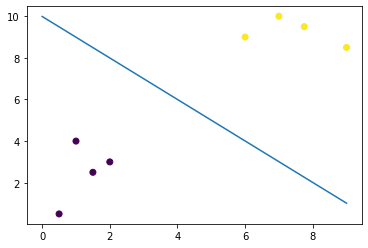

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
plt.plot(hiperplano, hiperplano_y)
plt.scatter(x_coord, y_coord, c = clase)

plt.draw()

**Clasificar nuevos datos**
Los nuevos datos se clasificarán según el lado del hiperplano en el que estén.

In [13]:
pt1 = [1.5, 2]
pt2 = [9, 8]

In [14]:
nuevos_puntos = np.array([pt1, pt2])
nuevos_puntos

array([[1.5, 2. ],
       [9. , 8. ]])

In [15]:
classifier.predict(nuevos_puntos)

array([0, 1])

# 3. Clasificar imágenes con SVM

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
# Los datos (son los datos de los píxeles de las imágenes)
len(digits.data[0]), digits.data[0]

(64,
 array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]))

In [18]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [19]:
print(len(digits.images))
digits.images

1797


array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [20]:
# Las etiquetas de cada uno de los vectores.
# target_names son todas las posibles etiquetas, y target
# target son las etiquetas que se han dado a los vectores anteriores

print(len(digits.target))
print(len(digits.target_names))
digits.target, digits.target_names

1797
10


(array([0, 1, 2, ..., 8, 9, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [21]:
# Lista con los datos de las imágenes y el target

images_and_labels = list(zip(digits.images, digits.target))
# El dato y la etiqueta ( es el número 0)
images_and_labels[80]

(array([[ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.],
        [ 0.,  0.,  0.,  1., 16., 16.,  3.,  0.],
        [ 0.,  5., 11., 15., 16., 16.,  0.,  0.],
        [ 0.,  4., 15., 16., 16., 15.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 16.,  7.,  0.,  0.],
        [ 0.,  0.,  0., 10., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0.,  2., 13., 15.,  2.,  0.]]),
 1)

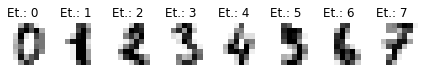

In [22]:
fig, axes = plt.subplots(1, 8)

for ax, (image, label) in zip(axes, images_and_labels[0:8]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title("Et.: %i   " % label)

    fig.tight_layout()

In [23]:
digits.images.shape

(1797, 8, 8)

In [24]:
# Hay 64 pixeles en cada imagen, se hace un cambio para que aparezcan los 64 por cada imagen.
data_reshaped = digits.images.reshape(digits.images.shape[0], -1)
data_reshaped.shape

(1797, 64)

In [25]:
# Se isntancia el modelo

classifier = SVC(gamma= 0.001)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, digits.target, test_size = 0.5, shuffle = False)

In [27]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [28]:
predictions = classifier.predict(X_test)

In [29]:
X_test_reshaped = X_test.reshape(len(X_test), digits.images.shape[1], digits.images.shape[2])
X_test_reshaped.shape

(899, 8, 8)

In [30]:
images_and_predictions = list(zip(X_test_reshaped, predictions))

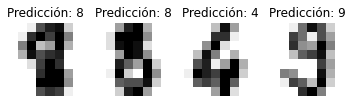

In [43]:
fig, axes = plt.subplots(1, 4)

for ax, (image, prediction) in zip(axes, images_and_predictions[0:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title("Predicción: %i" % prediction)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

